In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = r"C:\Users\Katie\Desktop\Dataset"

In [3]:
CATEGORIES=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"]

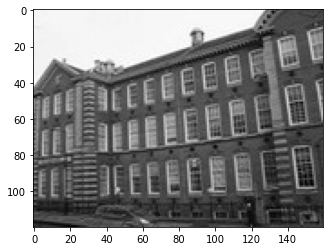

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(120, 160)


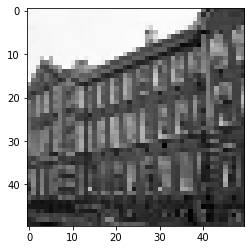

In [6]:
IMG_size=50

new_array=cv2.resize(img_array,(IMG_size,IMG_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_data=[] 

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_size,IMG_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [8]:
print(len(training_data))

4178


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:40]:
    print (sample[1])

15
35
29
1
25
26
9
1
28
37
1
16
12
26
21
9
28
14
27
31
33
35
17
7
39
24
1
32
30
2
8
19
4
36
16
28
4
0
31
38


In [11]:
X = []
y = []

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_size,IMG_size, 1)
y=np.array(y) 

In [13]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [15]:
#X[1]

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import pickle

In [17]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
X = X/255.0

In [29]:
model = Sequential()
model.add( Conv2D(64,(3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(40))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

#model.compile(loss = "binary_crossentropy",
 #            optimizer = "adam",
  #           metrics=["accuracy"])

model.fit(X, y, batch_size=40,epochs=10, validation_split=0.1)#epochs=10,3

Epoch 1/10
94/94 [==============================] - 10s 109ms/step - loss: 2.7932 - accuracy: 0.2665 - val_loss: 1.5840 - val_accuracy: 0.5885
Epoch 2/10
94/94 [==============================] - 10s 105ms/step - loss: 0.9292 - accuracy: 0.7652 - val_loss: 0.5765 - val_accuracy: 0.8756
Epoch 3/10
94/94 [==============================] - 11s 117ms/step - loss: 0.3823 - accuracy: 0.9045 - val_loss: 0.4076 - val_accuracy: 0.8971
Epoch 4/10
94/94 [==============================] - 10s 111ms/step - loss: 0.1972 - accuracy: 0.9545 - val_loss: 0.3245 - val_accuracy: 0.9187
Epoch 5/10
94/94 [==============================] - 10s 106ms/step - loss: 0.1193 - accuracy: 0.9721 - val_loss: 0.2829 - val_accuracy: 0.9258
Epoch 6/10
94/94 [==============================] - 11s 116ms/step - loss: 0.0846 - accuracy: 0.9777 - val_loss: 0.1436 - val_accuracy: 0.9641
Epoch 7/10
94/94 [==============================] - 10s 110ms/step - loss: 0.0456 - accuracy: 0.9888 - val_loss: 0.1085 - val_accuracy: 0.9665

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_9 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 128)        

In [31]:
#"7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"

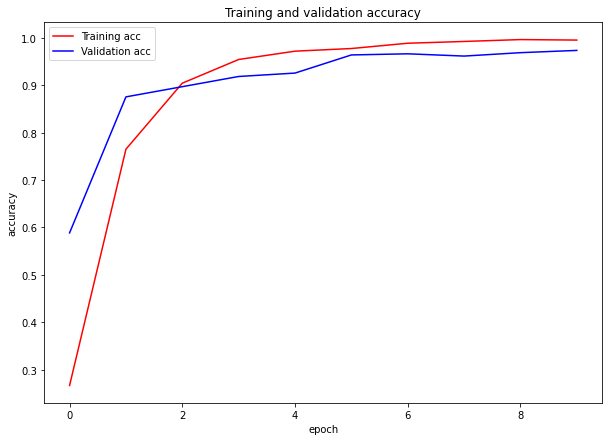

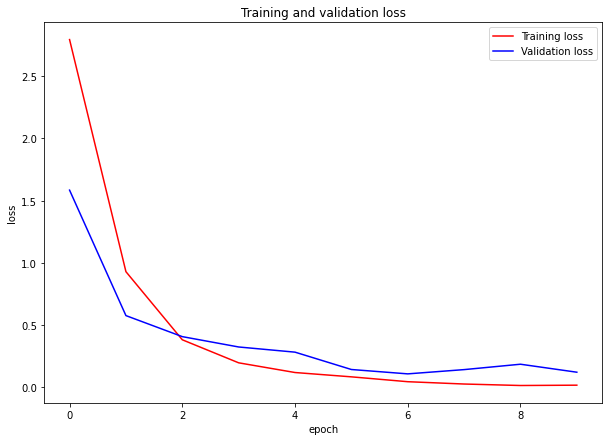

In [32]:
accuracy =model.history.history["accuracy"]
val_accuracy = model.history.history["val_accuracy"]
loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
epochs = range(len(accuracy))
plt.figure(figsize=(10,7)) 
plt.plot(epochs, accuracy, "r", label="Training acc")
plt.plot(epochs, val_accuracy, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure(figsize=(10,7)) 
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [22]:
#model.save("best_model.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: best_model.model\assets


In [23]:
import cv2
import tensorflow as tf

CATEGORIES=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"]

def prepare(filepath):
    IMG_size=50
    img_array= cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_size,IMG_size))
    return new_array.reshape(-1, IMG_size,IMG_size, 1)

model=tf.keras.models.load_model("best_model.model")

prediction = model.predict([prepare("S18-16.jpeg")])

print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
